[View in Colaboratory](https://colab.research.google.com/github/mlaskowski17/Reinforcement-Learning/blob/master/1.%20Markov%20Decision%20Processes/Google_Dopamine.ipynb)

## GOOGLE DOPAMINE



In [0]:
# INSTALL NECESSARY PACKAGES.

# dopamine library for RL
!pip install --upgrade --no-cache-dir dopamine-rl
# one of opamine dependencies
!pip install cmake
# Arcade Learning Environment
!pip install atari_py

In [0]:
# NECESSARY IMPORTS AND GLOBALS

# matrix math
import numpy as np
# load files
import os
# dopamine framework (DQN for baselines)
from dopamine.agents.dqn import dqn_agent
# high level agent-environment excecution engine
from dopamine.atari import run_experiment
# visualization + data downloading
from dopamine.colab import utils as colab_utils
# warnings
from absl import flags

#w here to store training logs
BASE_PATH = '/tmp/colab_dope_run'  # @param
# which arcade environment?
GAME = 'Asterix'  # @param

In [0]:
# CREATE A NEW AGENT FROM SCRATCH

#define where to store log data
LOG_PATH = os.path.join(BASE_PATH, 'basic_agent', GAME)

class BasicAgent(object):
  """This agent randomly selects an action and sticks to it. It will change
  actions with probability switch_prob."""
  def __init__(self, sess, num_actions, switch_prob=0.1):
    #tensorflow session
    self._sess = sess
    #how many possible actions can it take?
    self._num_actions = num_actions
    # probability of switching actions in the next timestep?
    self._switch_prob = switch_prob
    #initialize the action to take (randomly)
    self._last_action = np.random.randint(num_actions)
    #not debugging
    self.eval_mode = False
  
  #How select an action? 
  #we define our policy here
  def _choose_action(self):
    if np.random.random() <= self._switch_prob:
      self._last_action = np.random.randint(self._num_actions)
    return self._last_action
    
  #when it checkpoints during training, anything we should do?
  def bundle_and_checkpoint(self, unused_checkpoint_dir, unused_iteration):
    pass
    
  #loading from checkpoint
  def unbundle(self, unused_checkpoint_dir, unused_checkpoint_version,
               unused_data):
    pass
  
  #first action to take
  def begin_episode(self, unused_observation):
    return self._choose_action()
  
  #cleanup
  def end_episode(self, unused_reward):
    pass
  
  #we can update our policy here
  #using the reward and observation
  #dynamic programming, Q learning, monte carlo methods, etc.
  def step(self, reward, observation):
    return self._choose_action()
  
def create_basic_agent(sess, environment):
  """The Runner class will expect a function of this type to create an agent."""
  return BasicAgent(sess, num_actions=environment.action_space.n,
                     switch_prob=0.2)

# Create the runner class with this agent. We use very small numbers of steps
# to terminate quickly, as this is mostly meant for demonstrating how one can
# use the framework. We also explicitly terminate after 110 iterations (instead
# of the standard 200) to demonstrate the plotting of partial runs.
basic_runner = run_experiment.Runner(LOG_PATH,
                                      create_basic_agent,
                                      game_name=GAME,
                                      num_iterations=200,
                                      training_steps=10,
                                      evaluation_steps=10,
                                      max_steps_per_episode=100)

In [7]:
# TRAIN BASIC AGENT

print('Will train basic agent, please be patient, may be a while...')
basic_runner.run_experiment()
print('Done training!')

Will train basic agent, please be patient, may be a while...
INFO:tensorflow:Beginning training...
INFO:tensorflow:Starting iteration 0
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 693.79
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 1
INFO:tensorflow:Average undiscounted return per training episode: 200.00
INFO:tensorflow:Average training steps per second: 691.20
INFO:tensorflow:Average undiscounted return per evaluation episode: 150.00
INFO:tensorflow:Starting iteration 2
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 696.24
INFO:tensorflow:Average undiscounted return per evaluation episode: 50.00
INFO:tensorflow:Starting iteration 3
INFO:tensorflow:Average undiscounted return per training episode: 100.00
INFO:tensorflow:Average training steps per second: 705.85
INFO:t

So far we have trained our RL agent using a random policy in the asterix environment.  We have trained to learn an optimal policy by choosing actions randomly.

Generally we dont have to create our own agent. What we could do we could subclass the existing agent and we could extend it.

In [0]:
# LOAD BASELINE DATA
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* /content/
experimental_data = colab_utils.load_baselines('/content')

In [9]:
# LOAD THE TRAINING LOGS
basic_data = colab_utils.read_experiment(log_path=LOG_PATH, verbose=True)
basic_data['agent'] = 'BasicAgent'
basic_data['run_number'] = 1
experimental_data[GAME] = experimental_data[GAME].merge(basic_data,
                                                        how='outer')

Reading statistics from: /tmp/colab_dope_run/basic_agent/Asterix//logs/log_199


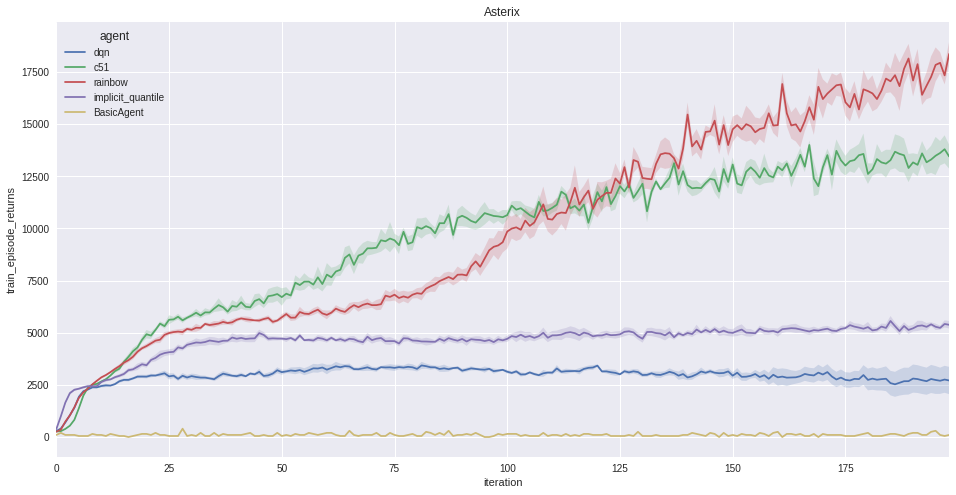

In [10]:
# PLOT TRAINING RESULTS

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=experimental_data[GAME], time='iteration', unit='run_number',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title(GAME)
plt.show()